In [241]:
import numpy as np
import matplotlib.pyplot as plt

In [242]:
w = 4
T = 10000
xi = 0
xf = 100
yi = 25
yf = 25
numSteps = 1001
h = (xf - xi) / (numSteps - 1)
a_guess1 = 0
a_guess2 = -1
maxIterations = 100
tol= 0.01

In [243]:
def f(y, a):
  dydx = a
  dadx = (w / T) * (np.sqrt(1 + a**2))

  return dydx, dadx

In [244]:
def rk4(y0, a0):
  y = np.zeros(numSteps)
  a = np.zeros(numSteps)

  y[0] = y0
  a[0] = a0
  i = 0

  while i < numSteps - 1:
    #k1
    k1y, k1a = f(y[i], a[i])

    #k2
    k2y, k2a = f(y[i] + (h / 2) * k1y, a[i] + (h / 2) * k1a)

    #k3
    k3y, k3a = f(y[i] + (h / 2) * k2y, a[i] + (h / 2) * k2a)

    #k4
    k4y, k4a = f(y[i] + h * k3y, a[i] + h * k3a)

    y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
    a[i + 1] = a[i] + (h / 6) * (k1a + 2 * k2a + 2 * k3a + k4a)

    i += 1

  return y, a

In [245]:
def shootingMethod(a1, a2):
  i = 0
  converged = False
  while i < maxIterations and not converged:
    i += 1
    y1, a1Array = rk4(yi, a1) #solves ODEs using RK4 and 2 slope guesses
    y2, a2Array = rk4(yi, a2)

    y1_end = y1[-1] #gets the last y value for each guess
    y2_end = y2[-1]

    #check if either guess already satisfies the boundary
    if abs(y1_end - yf) < tol:
      converged = True
      return a1, y1 #ends loop if the height of the 2nd post is within tol, and returns the slope and cable height
    if abs(y2_end - yf) < tol:
      converged = True
      return a2, y2

    a_mid = 0.5*(a1 + a2) # solution is between the 2 guesses and we take a_mid by the bisecion method
    y_mid, a_midArray = rk4(yi, a_mid) #solve ODE with RK4 and midpoint slope
    y_mid_end = y_mid[-1] #gets cable height at 2nd post

    if abs(y_mid_end - yf) < tol: #if the midpoint slope gives a height within tol, return
      converged = True
      return a_mid, y_mid

    #adjusts brackets for next iteration
    if(y1_end - yf)*(y_mid_end - yf) < 0:
      a2 = a_mid
    else:
      a1 = a_mid

  #if the loop finishes without finding a slope, print failure msg
  if not converged:
    print("Did not converge")

In [246]:
def findLen(a, h):
  return np.sum(np.sqrt(1 + a**2) * h)

In [247]:
def q1(y_f):
  drop = yi - np.min(y_f)
  return drop

In [248]:
def q2(a_g1, a_g2):
  global xf, h, tol
  low = 200
  high = 400

  max_distance = low

  while (high - low) > tol:
    #get mid value
    mid = (low + high) / 2
    #update new final post distance
    xf = mid
    #update step size since xf is getting updated
    h = (xf - xi) / (numSteps - 1)
    #solve ODE for given distance
    a_f, y_f = shootingMethod(a_g1, a_g2)

    #find sag
    drop = yi - np.min(y_f)
    if drop <= 3: #if less than 3, acceptable sag
      low = mid
      max_distance = mid
    else: #if greater than 3, span too big
      high = mid

  return max_distance

In [249]:
def q3(span_i, span_f, a_g1):
    global xf, h

    xf = span_i
    h = (xf - xi) / (numSteps - 1)

    y_span_i, a_span_i = rk4(yi, a_g1) #solve ODE using rk4 to get an array returned
    length_i = findLen(a_span_i, h) #find length of 100m span
    #print (length_i)

    xf = span_f #update final pole x distance to max distance
    h = (xf - xi) / (numSteps - 1)

    y_span_f, a_span_f = rk4(yi, a_g1)
    length_f = findLen(a_span_f, h) #find length of max span
    #print (length_f)

    return length_f - length_i #return max length - original length

Final slope: -0.02001953125
Cable height at post 1:  25
Cable height at post 2:  24.998180453930775
The wires will drop  0.5009264400062463 m when placed 100 m apart.
The maximum distance allowed before sag exceeds 3 m is  244.854736328125 m
The extra wire needed for max distance is  145.36512410337693 m
When the span of the cables is 100m, but one post is raised 1m, the sag increases from 0.5009264400062463 m to 1.125241007603048 m
This proves that if the cable posts are at different heights, the maximum distance must decrease as the wire sag increases.


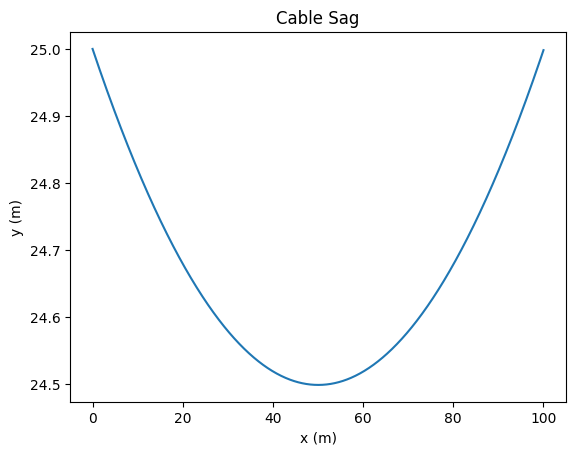

In [250]:
a_final, y_final = shootingMethod(a_guess1, a_guess2)

print("Final slope:", a_final)
print("Cable height at post 1: ", yi)
print("Cable height at post 2: ", y_final[-1])

x = np.linspace(xi, xf, numSteps)
plt.plot(x, y_final)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Cable Sag")

#question 1
drop_1 = q1(y_final)
print("The wires will drop ", drop_1, "m when placed 100 m apart.")

#question 2
maxDistance = q2(a_guess1, a_guess2)
print("The maximum distance allowed before sag exceeds 3 m is ", maxDistance, "m")

#question 3
extraWire = q3(100, maxDistance, a_guess1)
print("The extra wire needed for max distance is ", extraWire, "m")

#question 4
yi = 25 #standard height (25m)
yf = 26 #pole on a hill 1m heigher

xf = 100 #reset span to 100m
h = (xf - xi) / (numSteps - 1)

a, y = shootingMethod(1, -1)

drop_4 = yf - np.min(y) #find cable sag

print("When the span of the cables is 100m, but one post is raised 1m, the sag increases from", drop_1, "m to", drop_4, "m")
print("This proves that if the cable posts are at different heights, the maximum distance must decrease as the wire sag increases.")
